In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Data_Cleaned.csv')

In [4]:
neighbourhood  = df['neighbourhood group'].unique()
print(neighbourhood)
Brooklyn = df[(df['neighbourhood group']=='Brooklyn')]
Manhattan = df[(df['neighbourhood group']=='Manhattan')]
Queens = df[(df['neighbourhood group']=='Queens')]
Staten_Island = df[(df['neighbourhood group']=='Staten Island')]
Bronx = df[(df['neighbourhood group']=='Bronx')]

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [5]:
brookV = Brooklyn[(Brooklyn['host_identity_verified']=='verified')]
brookNV = Brooklyn[(Brooklyn['host_identity_verified']=='unconfirmed')]
ManV = Manhattan[(Manhattan['host_identity_verified']=='verified')]
ManNV = Manhattan[(Manhattan['host_identity_verified']=='unconfirmed')]
QueensV = Queens[(Queens['host_identity_verified']=='verified')]
QueensNV = Queens[(Queens['host_identity_verified']=='unconfirmed')]
StatenIV = Staten_Island[(Staten_Island['host_identity_verified']=='verified')]
StatenINV = Staten_Island[(Staten_Island['host_identity_verified']=='unconfirmed')]
BronxV = Bronx[(Bronx['host_identity_verified']=='verified')]
BronxNV = Bronx[(Bronx['host_identity_verified']=='unconfirmed')]

In [6]:
userVerificationPrice = {
    'Verified': (brookV.loc[:,"price"].mean(), ManV.loc[:,"price"].mean(), QueensV.loc[:,"price"].mean(),StatenIV.loc[:,"price"].mean(), BronxV.loc[:,"price"].mean()),
    'Unconfirmed': (brookNV.loc[:,"price"].mean(), ManNV.loc[:,"price"].mean(), QueensNV.loc[:,"price"].mean(),StatenINV.loc[:,"price"].mean(), BronxNV.loc[:,"price"].mean())
}


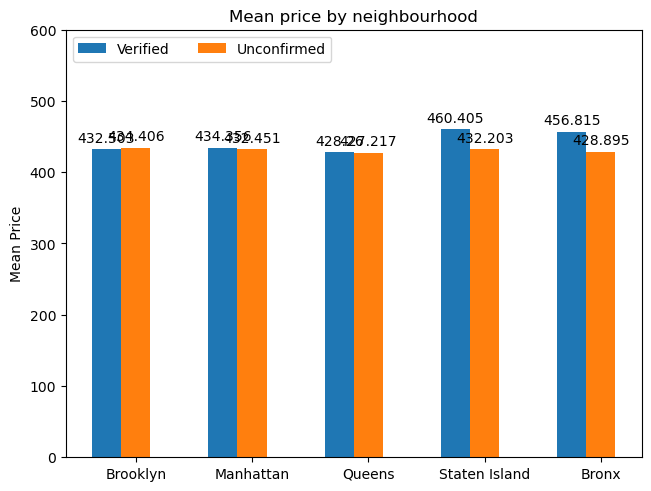

In [7]:
# COMPARISON
x = np.arange(len(neighbourhood))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in userVerificationPrice.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Price')
ax.set_title('Mean price by neighbourhood')
ax.set_xticks(x + width, neighbourhood)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 600)

plt.show()
#print(brooNV.loc[:,"price"].mean())

In [8]:
counts=df['neighbourhood group'].value_counts()

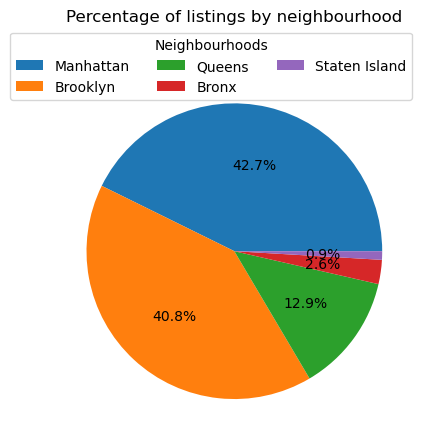

In [9]:
# COMPOSITION
y = counts.values
fig,ax=plt.subplots()

ax.pie(y,labels=None, autopct='%1.1f%%')
ax.legend(title="Neighbourhoods",
          labels =counts.index,
          loc="upper right",
          bbox_to_anchor=(1, 1.11),
          ncols=3)

ax.set_title('Percentage of listings by neighbourhood',y=1.1)
plt.show() 



In [10]:
df2= pd.DataFrame()


df2['service fee']=df['service fee']
df2['minimum nights']=df['minimum nights']

df2

,service fee,minimum nights
0,193.0,10.0
1,28.0,30.0
2,124.0,3.0
3,74.0,30.0
4,41.0,10.0
...,...,...
101769,169.0,1.0
101770,167.0,1.0
101771,198.0,3.0
101772,109.0,2.0


In [11]:
cols_to_norm=['service fee','minimum nights']
df2[cols_to_norm] = df2[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [12]:
df2

,service fee,minimum nights
0,0.804167,0.166667
1,0.116667,0.500000
2,0.516667,0.050000
3,0.308333,0.500000
4,0.170833,0.166667
...,...,...
101769,0.704167,0.016667
101770,0.695833,0.016667
101771,0.825000,0.050000
101772,0.454167,0.033333


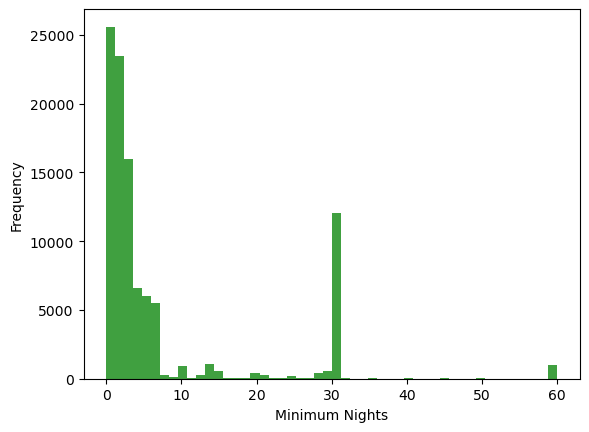

In [13]:
# DISTRIBUTION
plt.hist(df['minimum nights'],bins=50,facecolor='g',alpha=0.75)
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()

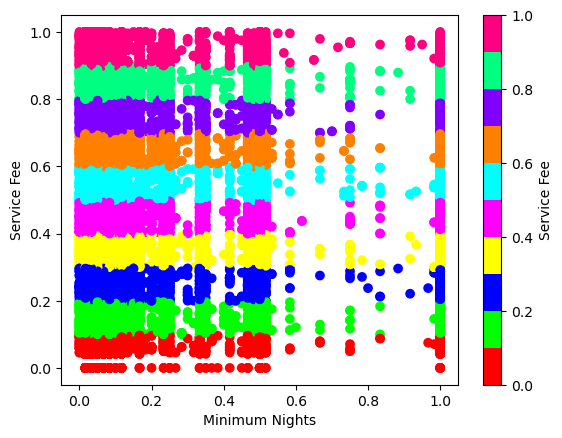

In [16]:
# BAD EXAMPLE OF A REPRESENTATION
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
y = df2['service fee']
x = df2['minimum nights']
custom_colors = [
    '#ff0000',  # Red
    '#00ff00',  # Green
    '#0000ff',  # Blue
    '#ffff00',  # Yellow
    '#ff00ff',  # Magenta
    '#00ffff',  # Cyan
    '#ff8000',  # Orange
    '#8000ff',  # Purple
    '#00ff80',  # Lime
    '#ff0080'   # Pink
]
custom_cmap = mcolors.ListedColormap(custom_colors)
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=y, cmap=custom_cmap)

fig.colorbar(scatter, ax=ax, label='Service Fee')
ax.set_xlabel('Minimum Nights')
ax.set_ylabel('Service Fee')

plt.show()

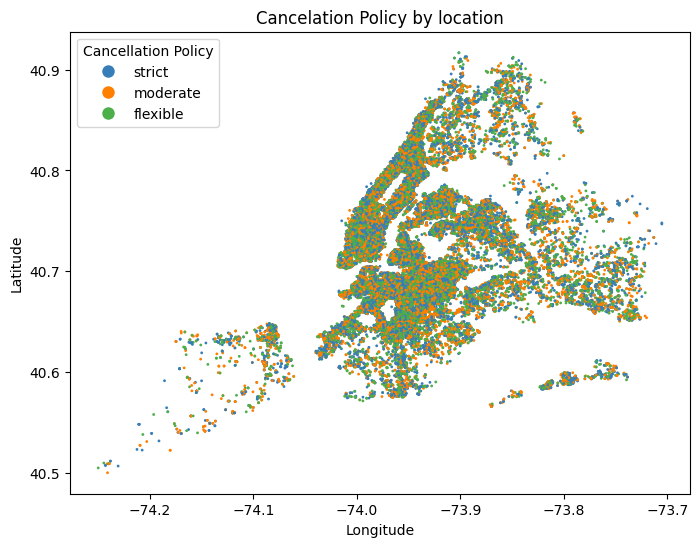

In [14]:
import matplotlib.lines as mlines

#  RELATIONSHIP

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
y = df['lat']
x = df['long']

category_to_color = {
    'strict': CB_color_cycle[0],
    'moderate': CB_color_cycle[1],
    'flexible': CB_color_cycle[2]
}




df['color'] = df['cancellation_policy'].map(category_to_color)

plt.figure(figsize=(8, 6))
plt.scatter(df['long'], df['lat'], c=df['color'], s=1)

legend_handles = []
for group, color in category_to_color.items():
    legend_handle = mlines.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10, label=group)
    legend_handles.append(legend_handle)


for group, color in category_to_color.items():
    legend_handle = mlines.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10, label=group)
    legend_handles.append(legend_handle)

legend_handles = legend_handles[0:3]
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cancelation Policy by location')
plt.legend(handles=legend_handles, title='Cancellation Policy', loc='upper left')

plt.show()


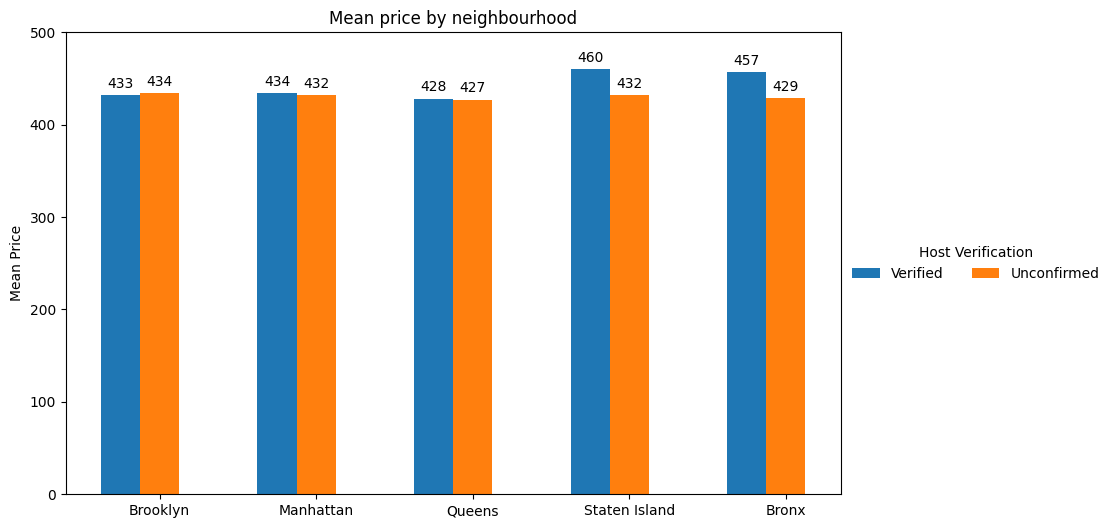

In [15]:
# IMPROVED REPRESENTATION
x = np.arange(len(neighbourhood))
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6))

for attribute, measurement in userVerificationPrice.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.0f')
    multiplier += 1
    


ax.set_ylabel('Mean Price')
ax.set_title('Mean price by neighbourhood')
ax.set_xticks(x + width, neighbourhood)
ax.legend(loc='right', ncols=3, title= 'Host Verification',bbox_to_anchor=(1.35, 0.5), frameon=False)
ax.set_ylim(0, 500)

plt.show()
